## Name - Sunanda Pal

### Data science and analytics internship


# GRIP Task 2 - From the given ‘Iris’ dataset, predicting the optimum number of clusters and representing it visually.
## Unsupervised ML
 

In [1]:
#import all the important libraries

from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

### Extracting the data

In [4]:
#Reading the data 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [11]:
df.shape #Gives the size of the dataset

(150, 4)

In [9]:
df.columns #Gives column / fields information

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [10]:
df.head() #Showing first 5 records

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df.isna().sum() #Checking if there is any null value that need to be handled

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [13]:
df.info() #Checking detailed information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**It is clear that there isn't any null value in the dataset**

### To understand relation between the data

In [14]:
df.describe() #To get ellaborate view

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.corr() #To get correlations between different fields

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Data distribution of correlations**

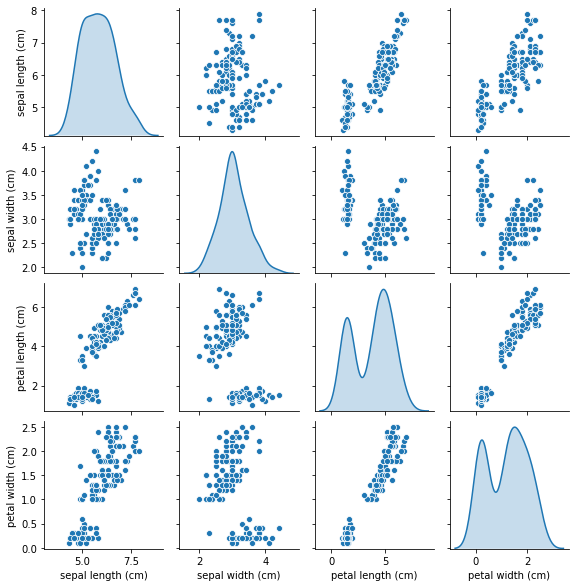

In [16]:
sns.pairplot(df,height=2, diag_kind='kde')

**Heat Map**

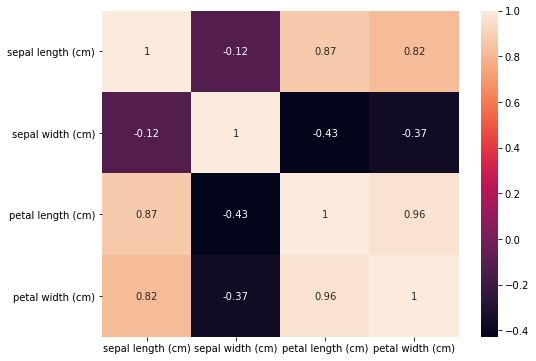

In [22]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(), annot=True) # heat map of correlations

### It is clear that there are groups in the data set
### K-means clustering algorithm can be used to find out clusters

### For that first we need to determine the number of clusters 
Elbow method can be used to find out total number of possible clusters

**Elbow method**

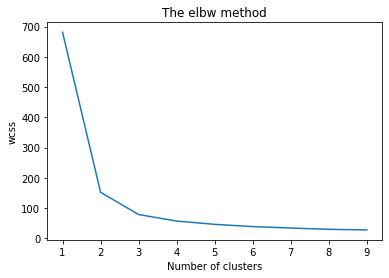

<Figure size 432x288 with 0 Axes>

In [23]:
X = df.iloc[:, [0, 1, 2, 3]].values #Preparing dataset

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,10),wcss)  # plotting the result
plt.title('The elbw method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') ## within cluster sum of square
plt.show()
plt.tight_layout()

*Optimum cluster is where elbow ocuurs in the graph.* 
*This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.*
**Therefore we can take the number of clusters = 3**

### Training the model with K-mean clustering algorithm

In [24]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Making Predictions
y_kmeans = kmeans.fit_predict(X)

### Visualizing the predicted clusters ###

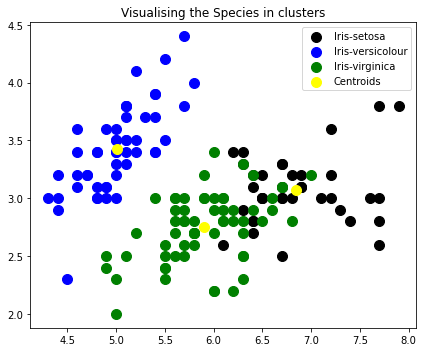

In [28]:

# Visualising the clusters - On the first two columns

plt.figure(figsize=(6,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters (yellow dots) 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualising the Species in clusters', fontsize=12)
plt.legend()
plt.tight_layout()